# Discovering MOABB

In this first notebook, we will use Motor Imagery (MI) BCI as first entry point to discover MOABB. We choose the dataset 2a from BCI Competition IV, a motor imagery task. We will use a CSP to enhance the signal-to-noise ratio of the EEG epochs and a LDA to classify these signals.

Please make sure you have verified your installation with the notebook `0_Minischool_Verify_Installation`.

## Downloading datasets

We will use the dataset 2a from BCI Competition IV as an example here. You could explicitely download the dataset with the following code.


In [2]:
from moabb.datasets import BNCI2014001

dataset = BNCI2014001()
dataset.download()

Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      

    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Creating RawArray with float64 dat

You could get the data from a specific subject, or a specific set of subjects. If you want to ge the data from the first subject:

In [5]:
subj = 1
data = dataset.get_data(subjects=[subj])
data

{1: {'session_T': {'run_0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>},
  'session_E': {'run_0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>,
   'run_5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}}}

The data are stored in nested dict, the first is the subject (here `1` as we have only selected one subject) , the second is the session (here `session_T` or `session_E`) and the runs (here from `run_0` to `run_5`).

In the MOABB terminology, the session are meant to stored different recordings of the same subject, for example across several days, while runs are more like blocks of a running experiment.

If we want to get the data from the first subject, session T and run 0:

In [7]:
subject, session, run = 1, "session_T", "run_0"
raw = data[subject][session][run]

raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG, 1 Stimulus
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 26
 projs: []
 sfreq: 250.0 Hz
>

## Exploring the data with MNE 

The raw object is a MNE file. All the possibilities opened by this toolbox are available, let's see some examples!

It is easy to get a visualization of the electrode positioning:

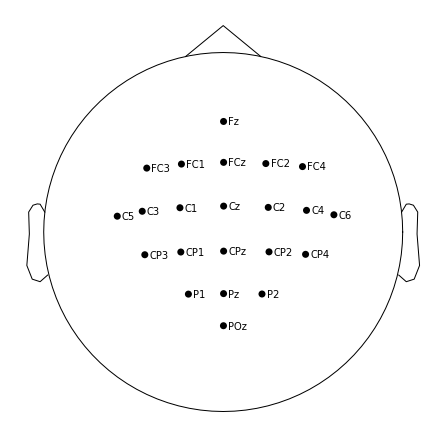

In [8]:
_ = raw.plot_sensors(show_names=True)

Or visualize EEG signal:

Using matplotlib as 2D backend.


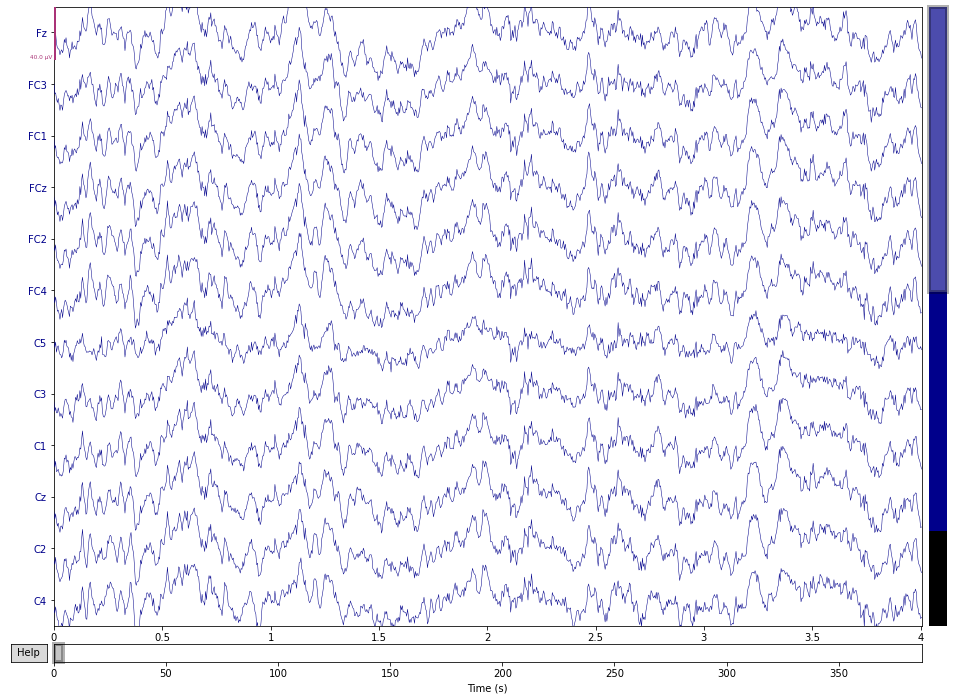

In [9]:
_ = raw.plot(duration=4, n_channels=12, color={'eeg':'darkblue'})

There are lots tools for investigating EEG, such spectral domain:

Effective window size : 8.192 (s)


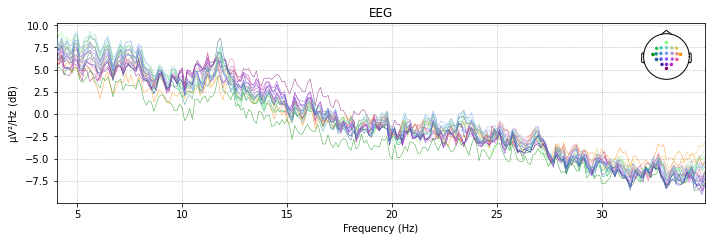

In [10]:
_ = raw.plot_psd(fmin=4., fmax=35, picks=['eeg'])

You could check the rich and 

## Running a benchmark with MOABB

1. Choose a paradigm, we will restrict the left- and right-hand classification on the dataset 2a of BCI Competition IV

In [12]:
from moabb.paradigms import LeftRightImagery

paradigm = LeftRightImagery()
datasets = [BNCI2014001()]

2. Create a machine learning pipeline (following a scikit learn style). For this example, we will use a Common Spatial Patterns (CSP) to enhance the signal and reduce the dimensionality, and a Linear Discriminant Analysis (LDA) for classification.

In [13]:
from mne.decoding import CSP
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pipeline = make_pipeline(CSP(n_components=8), LDA())
pipelines = {'csp+lda': pipeline}

3. Define an evaluation. Here we will use a within-session cross-validation, using 5 folds. You need to define the paradigm and the chosen dataset for the evaluation.

In [14]:
from moabb.evaluations import WithinSessionEvaluation

evaluation = WithinSessionEvaluation(paradigm=paradigm, datasets=datasets, overwrite=False)

We could now run the evaluation by evaluating the chosen pipelines (here CSP+LDA)

In [15]:
results_datasets = evaluation.process(pipelines) 

001-2014-WithinSession: 100%|███████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 302.59it/s]


The dataset are store in a [pandas DataFrame](https://pandas.pydata.org/), this structure is similar to an excel file (and could be exported as xls!).

Using tools like [seaborn](seaborn.pydata.org/), it is easy to plot nice graphs from those results.

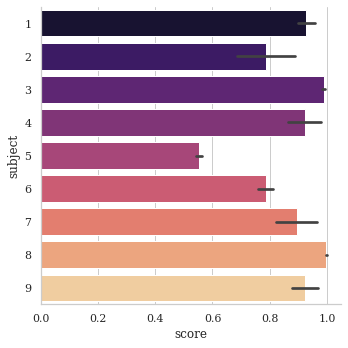

In [17]:
import seaborn as sns

sns.catplot(kind='bar', x="score", y="subject", hue=None, data=results_datasets, palette="magma")